## **The following is a machine learning algorithm script for predicting core body temperature using the PROSPIE Data Set.**

### **Step 1**: Read in all of the data files (physiological data, environmental data, and core body temperature data)

In [18]:
# The data is already merged into a single excel file. The following code is to load in the data.

#%pip install openpyxl
import pandas as pd
from pathlib import Path
from IPython.display import display

df = pd.read_excel('PROSPIE_wrist_temp_deviations combined in one file.xlsx', sheet_name='Data_with_Baselines_Deviations') # read in the excel file with the PROSPIE data
display(df.head())


,Condition,Time,ActivityCode,Participant,Sex,Age,Bodymasskg,Heightcm,Bodyfat%,VO2peakmlkgmin,...,R-Rintmanual,SDRRManual,HRV - RMSSDmanual,HRV - R-R intsoftware,HRV - SDRRSoftware,HRV - RMSSDSoftware,Baseline_Per_Participant,Baseline_ParticipantCondition,Deviation_from_ParticipantBaseline,Deviation_from_ParticipantCondition
0,6,00:00:00,4,29,2,36,57.9,168.5,10.9,51.2,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,33.623,32.286,2.110,0.773
1,6,00:01:00,4,29,2,36,57.9,168.5,10.9,51.2,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,33.623,32.286,1.776,0.439
2,6,00:02:00,4,29,2,36,57.9,168.5,10.9,51.2,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,33.623,32.286,1.504,0.167
3,6,00:03:00,4,29,2,36,57.9,168.5,10.9,51.2,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,33.623,32.286,1.316,-0.021
4,6,00:04:00,4,29,2,36,57.9,168.5,10.9,51.2,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,33.623,32.286,1.233,-0.104


In [19]:
# list column names
print(df.columns.tolist())

['Condition', 'Time', 'ActivityCode', 'Participant', 'Sex', 'Age', 'Bodymasskg', 'Heightcm', 'Bodyfat%', 'VO2peakmlkgmin', 'Acclimationstatus', 'Trainingstatus', 'Clothing', 'Environmental temperature (chamber or cooling area outside chamber) - Humidity', 'Environmental temperature (chamber or cooling area outside chamber) - Temp', 'Environmental temperature (chamber or cooling area outside chamber) - Wind', 'Environmental (Inside clothing) -  Tfront', 'Environmental (Inside clothing) - Rhfront', 'Environmental (Inside clothing) -  Tback', 'Environmental (Inside clothing) - Rhback', 'Activity - workrest', 'OxygenConsumption - ml.kg.min', 'Treadmillsettings - Speedkm.hr-1', 'Gradient%', 'Solar present', 'Solar radiation (W.m2) - Overall (1.00-1.50m)', 'Solar radiation (W.m2) - Middle (1.00-1.50m)', 'Solar radiation (W.m2) - Overall (1.00-1.70m)', 'SweatProductionL', 'Corerectal', 'Δcore', 'SkinTemp - abdomen', 'SkinTemp - calf', 'SkinTemp - chest', 'SkinTemp - foot', 'SkinTemp - hand', 

### **Step 2**: Clean-Up Data (Remove columns not beneficial for the model, remove rows with a lot of missing data, etc.)

In [20]:

# keep only the columns that are beneficial
df_cleaned = df[['Environmental temperature (chamber or cooling area outside chamber) - Humidity','Environmental temperature (chamber or cooling area outside chamber) - Temp','Corerectal','Deviation_from_ParticipantBaseline','HR']]

#df_cleaned = df['Environmental temperature (chamber or cooling area outside chamber) - Humidity','Environmental temperature (chamber or cooling area outside chamber) - Temp','Corerectal','SkinTemp - lower arm','HR']
display(df_cleaned.head(20))

,Environmental temperature (chamber or cooling area outside chamber) - Humidity,Environmental temperature (chamber or cooling area outside chamber) - Temp,Corerectal,Deviation_from_ParticipantBaseline,HR
0,49.8,25.2,36.820000,2.110,47.966667
1,49.9,25.2,36.826667,1.776,44.400000
2,49.8,25.2,36.830000,1.504,46.566667
3,49.6,25.2,36.826667,1.316,50.633333
4,49.4,25.1,36.823333,1.233,52.133333
5,49.0,25.2,36.816667,1.128,51.700000
6,49.1,25.3,36.816667,1.086,51.500000
7,49.1,25.3,36.830000,1.086,50.033333
8,49.4,25.3,36.860000,1.044,51.000000
9,49.1,25.3,36.843333,1.086,53.500000


In [21]:
df_cleaned = df_cleaned.replace([9999,9999.0], pd.NA) # replace 9999 value with NaN, as this represents missing data
df = df[df['Corerectal'] != 9999] # remove rows where core body temperature is missing, as this is the target variable
threshold = int(df_cleaned.shape[1] * 0.8)
df_cleaned = df_cleaned.dropna(thresh=threshold) # drop columns with more than 20% missing data
display(df_cleaned.head(20))

,Environmental temperature (chamber or cooling area outside chamber) - Humidity,Environmental temperature (chamber or cooling area outside chamber) - Temp,Corerectal,Deviation_from_ParticipantBaseline,HR
0,49.8,25.2,36.82,2.110,47.966667
1,49.9,25.2,36.826667,1.776,44.4
2,49.8,25.2,36.83,1.504,46.566667
3,49.6,25.2,36.826667,1.316,50.633333
4,49.4,25.1,36.823333,1.233,52.133333
5,49.0,25.2,36.816667,1.128,51.7
6,49.1,25.3,36.816667,1.086,51.5
7,49.1,25.3,36.83,1.086,50.033333
8,49.4,25.3,36.86,1.044,51.0
9,49.1,25.3,36.843333,1.086,53.5


In [22]:
# understand the dataset

# print the shape of the dataframe
print(df_cleaned.shape)

# determine the data types of the columns and the number of non-null values
print(df_cleaned.info())

# identify and quantify missing values in the dataset
df_cleaned.isnull().sum()

#check for duplicate rows in the dataset
df_cleaned.duplicated().sum()

# drop duplicate rows
df_cleaned.drop_duplicates(inplace=True)

# drop columns that are very sparse (more than 50% missing data)
# df_cleaned.drop(columns=[
#     'SW', 'RPE', 'Perceptual - TS',
#     'HRV - SDRRSoftware', 'HRV - RMSSDSoftware'
# ], inplace=True)

#df_model = df_cleaned.fillna(df_cleaned.median(numeric_only=True)) # fill in missing values with the median of each column
#df_model['HR_missing'] = df_cleaned['HR'].isnull().astype(int) # create a new column to indicate if HR (heart rate) was missing
# as a note, this is to help the model understand if HR was missing because HR initially had quite a bit of missing data, but is an important parameter

# save the cleaned dataframe to a new CSV file
df_cleaned.to_csv("Cleaned_PROSPIE_Dataset.csv", index=False)
print(df_cleaned.info())

(17020, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 17020 entries, 0 to 17263
Data columns (total 5 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Environmental temperature (chamber or cooling area outside chamber) - Humidity  17020 non-null  object 
 1   Environmental temperature (chamber or cooling area outside chamber) - Temp      17020 non-null  object 
 2   Corerectal                                                                      16960 non-null  object 
 3   Deviation_from_ParticipantBaseline                                              16919 non-null  float64
 4   HR                                                                              11724 non-null  object 
dtypes: float64(1), object(4)
memory usage: 797.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 16981 entries, 0 to

### **Step 2.5**: Match the PROSPIE Dataset to my Fitbit Data (need to ensure that columns are the same) and temporal features were added.

In [23]:
# start by reordering the columns
cols = df_cleaned.columns.tolist() # list column names
print(cols)
cols = ['Corerectal', 'Deviation_from_ParticipantBaseline', 'HR', 'Environmental temperature (chamber or cooling area outside chamber) - Temp', 'Environmental temperature (chamber or cooling area outside chamber) - Humidity']
df_cleaned = df_cleaned[cols]
display(df_cleaned.head(20))

['Environmental temperature (chamber or cooling area outside chamber) - Humidity', 'Environmental temperature (chamber or cooling area outside chamber) - Temp', 'Corerectal', 'Deviation_from_ParticipantBaseline', 'HR']


,Corerectal,Deviation_from_ParticipantBaseline,HR,Environmental temperature (chamber or cooling area outside chamber) - Temp,Environmental temperature (chamber or cooling area outside chamber) - Humidity
0,36.82,2.110,47.966667,25.2,49.8
1,36.826667,1.776,44.4,25.2,49.9
2,36.83,1.504,46.566667,25.2,49.8
3,36.826667,1.316,50.633333,25.2,49.6
4,36.823333,1.233,52.133333,25.1,49.4
5,36.816667,1.128,51.7,25.2,49.0
6,36.816667,1.086,51.5,25.3,49.1
7,36.83,1.086,50.033333,25.3,49.1
8,36.86,1.044,51.0,25.3,49.4
9,36.843333,1.086,53.5,25.3,49.1


In [24]:
# rename the correctal column to CBT (Deg F) to match data
df_cleaned.rename(columns={'Corerectal': 'CBT (Deg C):'}, inplace=True)

In [25]:
# now add rolling features for skin temperature data

copy_df = df_cleaned.copy()  # create a copy of the cleaned dataframe to avoid modifying the original

# rename skin temperature column to match my fitbit data column name
copy_df = copy_df.rename(columns={'Deviation_from_ParticipantBaseline': 'temperature'})

# convert all columns to numeric which will force errors to NaN

for col in copy_df.columns:
    copy_df[col] = pd.to_numeric(copy_df[col], errors='coerce')

# now add rolling features for skin temperature data
rolling_windows = [35, 20, 5]
lag_minutes = 10

#add rolling mean, median, and std for skin temperature and place columns next to original temperature column
for w in rolling_windows:
    copy_df[f"temp_mean_{w}min"] = copy_df['temperature'].rolling(w, min_periods=1).mean()
    copy_df[f"temp_median_{w}min"] = copy_df['temperature'].rolling(w, min_periods=1).median()
    copy_df[f"temp_std_{w}min"] = copy_df['temperature'].rolling(w, min_periods=1).std()

    # now insert rolling features next to original temperature column
    temp_idx = copy_df.columns.get_loc('temperature')
    copy_df.insert(temp_idx + 1, f"temp_mean_{w}min", copy_df.pop(f"temp_mean_{w}min"))
    copy_df.insert(temp_idx + 2, f"temp_median_{w}min", copy_df.pop(f"temp_median_{w}min"))
    copy_df.insert(temp_idx + 3, f"temp_std_{w}min", copy_df.pop(f"temp_std_{w}min"))

    # now add 10 min lagged features for skin temperature
    for stat in ["mean", "median", "std"]:
            base_col = f"temp_{stat}_{w}min"
            lag_col  = f"{base_col}_lag{lag_minutes}m"
            copy_df[lag_col] = copy_df[base_col].shift(periods=lag_minutes)

    # insert lagged features next to their respective rolling feature columns by minute (ie. 5 min rolling features for mean, median, std together, then lag features for those 5 min rolling features together, etc.)
    lag_idx = copy_df.columns.get_loc(f"temp_std_{w}min") + 1
    for stat in ["mean", "median", "std"]:
        base_col = f"temp_{stat}_{w}min"
        lag_col  = f"{base_col}_lag{lag_minutes}m"
        copy_df.insert(lag_idx, lag_col, copy_df.pop(lag_col))
        lag_idx += 1

# calculate the difference in heart rate from one minute to the next
copy_df["temp_diff_1"] = copy_df["temperature"].diff() 

# compute the slope over rolling 5 min intervals to see how quickly temperature is changing
copy_df["temp_slope_5m"] = copy_df["temperature"].rolling(window=5, min_periods=1).apply(
    lambda x: (x.iloc[-1] - x.iloc[0]) / (len(x) - 1) if len(x) > 1 else 0.0,
    raw=False)

# insert the temp_diff_1 and temp_slope_5min columns on the left side next biological feature column (in this case HR)
bio_idx = copy_df.columns.get_loc('HR')
copy_df.insert(bio_idx, "temp_diff_1", copy_df.pop("temp_diff_1"))
copy_df.insert(bio_idx + 1, "temp_slope_5m", copy_df.pop("temp_slope_5m"))
    
display(copy_df.head(20))


,CBT (Deg C):,temperature,temp_mean_5min,temp_median_5min,temp_std_5min,temp_mean_5min_lag10m,temp_median_5min_lag10m,temp_std_5min_lag10m,temp_mean_20min,temp_median_20min,...,temp_median_35min,temp_std_35min,temp_mean_35min_lag10m,temp_median_35min_lag10m,temp_std_35min_lag10m,temp_diff_1,temp_slope_5m,HR,Environmental temperature (chamber or cooling area outside chamber) - Temp,Environmental temperature (chamber or cooling area outside chamber) - Humidity
0,36.820000,2.110,2.110000,2.110,NaN,NaN,NaN,NaN,2.110000,2.1100,...,2.1100,NaN,NaN,NaN,NaN,NaN,0.000000,47.966667,25.2,49.8
1,36.826667,1.776,1.943000,1.943,0.236174,NaN,NaN,NaN,1.943000,1.9430,...,1.9430,0.236174,NaN,NaN,NaN,-0.334,-0.334000,44.400000,25.2,49.9
2,36.830000,1.504,1.796667,1.776,0.303528,NaN,NaN,NaN,1.796667,1.7760,...,1.7760,0.303528,NaN,NaN,NaN,-0.272,-0.303000,46.566667,25.2,49.8
3,36.826667,1.316,1.676500,1.640,0.345224,NaN,NaN,NaN,1.676500,1.6400,...,1.6400,0.345224,NaN,NaN,NaN,-0.188,-0.264667,50.633333,25.2,49.6
4,36.823333,1.233,1.587800,1.504,0.358780,NaN,NaN,NaN,1.587800,1.5040,...,1.5040,0.358780,NaN,NaN,NaN,-0.083,-0.219250,52.133333,25.1,49.4
5,36.816667,1.128,1.391400,1.316,0.255319,NaN,NaN,NaN,1.511167,1.4100,...,1.4100,0.371772,NaN,NaN,NaN,-0.105,-0.162000,51.700000,25.2,49.0
6,36.816667,1.086,1.253400,1.233,0.166496,NaN,NaN,NaN,1.450429,1.3160,...,1.3160,0.375503,NaN,NaN,NaN,-0.042,-0.104500,51.500000,25.3,49.1
7,36.830000,1.086,1.169800,1.128,0.101441,NaN,NaN,NaN,1.404875,1.2745,...,1.2745,0.370757,NaN,NaN,NaN,0.000,-0.057500,50.033333,25.3,49.1
8,36.860000,1.044,1.115400,1.086,0.072137,NaN,NaN,NaN,1.364778,1.2330,...,1.2330,0.367080,NaN,NaN,NaN,-0.042,-0.047250,51.000000,25.3,49.4
9,36.843333,1.086,1.086000,1.086,0.029698,NaN,NaN,NaN,1.336900,1.1805,...,1.1805,0.357138,NaN,NaN,NaN,0.042,-0.010500,53.500000,25.3,49.1


In [26]:
# print dataframe columns only to check the names
print(copy_df.columns.tolist())

['CBT (Deg C):', 'temperature', 'temp_mean_5min', 'temp_median_5min', 'temp_std_5min', 'temp_mean_5min_lag10m', 'temp_median_5min_lag10m', 'temp_std_5min_lag10m', 'temp_mean_20min', 'temp_median_20min', 'temp_std_20min', 'temp_mean_20min_lag10m', 'temp_median_20min_lag10m', 'temp_std_20min_lag10m', 'temp_mean_35min', 'temp_median_35min', 'temp_std_35min', 'temp_mean_35min_lag10m', 'temp_median_35min_lag10m', 'temp_std_35min_lag10m', 'temp_diff_1', 'temp_slope_5m', 'HR', 'Environmental temperature (chamber or cooling area outside chamber) - Temp', 'Environmental temperature (chamber or cooling area outside chamber) - Humidity']


In [27]:
# now add the same temporal features for heart rate data
copy_df = copy_df.rename(columns={'HR': 'bpm'})
rolling_windows = [35, 20, 5]
lag_minutes = 10
#add rolling mean, median, and std for heart rate and place columns next to original bpm column
for w in rolling_windows:
    copy_df[f"bpm_mean_{w}min"] = copy_df['bpm'].rolling(w, min_periods=1).mean()
    copy_df[f"bpm_median_{w}min"] = copy_df['bpm'].rolling(w, min_periods=1).median()
    copy_df[f"bpm_std_{w}min"] = copy_df['bpm'].rolling(w, min_periods=1).std()

    # now insert rolling features next to original bpm column
    bpm_idx = copy_df.columns.get_loc('bpm')
    copy_df.insert(bpm_idx + 1, f"bpm_mean_{w}min", copy_df.pop(f"bpm_mean_{w}min"))
    copy_df.insert(bpm_idx + 2, f"bpm_median_{w}min", copy_df.pop(f"bpm_median_{w}min"))
    copy_df.insert(bpm_idx + 3, f"bpm_std_{w}min", copy_df.pop(f"bpm_std_{w}min"))

    # now add 10 min lagged features for heart rate
    for stat in ["mean", "median", "std"]:
            base_col = f"bpm_{stat}_{w}min"
            lag_col  = f"{base_col}_lag{lag_minutes}m"
            copy_df[lag_col] = copy_df[base_col].shift(periods=lag_minutes)

    # insert lagged features next to their respective rolling feature columns by minute (ie. 5 min rolling features for mean, median, std together, then lag features for those 5 min rolling features together, etc.)
    lag_idx = copy_df.columns.get_loc(f"bpm_std_{w}min") + 1
    for stat in ["mean", "median", "std"]:
        base_col = f"bpm_{stat}_{w}min"
        lag_col  = f"{base_col}_lag{lag_minutes}m"
        copy_df.insert(lag_idx, lag_col, copy_df.pop(lag_col))
        lag_idx += 1

# calculate the difference in heart rate from one minute to the next
copy_df["bpm_diff_1"] = copy_df["bpm"].diff() 

# compute the slope over rolling 5 min intervals to see how quickly heart rate is changing
copy_df["bpm_slope_5m"] = copy_df["bpm"].rolling(window=5, min_periods=1).apply(
    lambda x: (x.iloc[-1] - x.iloc[0]) / (len(x) - 1) if len(x) > 1 else 0.0,
    raw=False)

# insert the bpm_diff_1 and bpm_slope_5min columns on the left side next environmental feature column (in this case Environmental temperature)
env_idx = copy_df.columns.get_loc('Environmental temperature (chamber or cooling area outside chamber) - Temp')
copy_df.insert(env_idx, "bpm_diff_1", copy_df.pop("bpm_diff_1"))
copy_df.insert(env_idx + 1, "bpm_slope_5m", copy_df.pop("bpm_slope_5m"))

display(copy_df.head(20))


,CBT (Deg C):,temperature,temp_mean_5min,temp_median_5min,temp_std_5min,temp_mean_5min_lag10m,temp_median_5min_lag10m,temp_std_5min_lag10m,temp_mean_20min,temp_median_20min,...,bpm_mean_35min,bpm_median_35min,bpm_std_35min,bpm_mean_35min_lag10m,bpm_median_35min_lag10m,bpm_std_35min_lag10m,bpm_diff_1,bpm_slope_5m,Environmental temperature (chamber or cooling area outside chamber) - Temp,Environmental temperature (chamber or cooling area outside chamber) - Humidity
0,36.820000,2.110,2.110000,2.110,NaN,NaN,NaN,NaN,2.110000,2.1100,...,47.966667,47.966667,NaN,NaN,NaN,NaN,NaN,0.000000,25.2,49.8
1,36.826667,1.776,1.943000,1.943,0.236174,NaN,NaN,NaN,1.943000,1.9430,...,46.183333,46.183333,2.522014,NaN,NaN,NaN,-3.566667,-3.566667,25.2,49.9
2,36.830000,1.504,1.796667,1.776,0.303528,NaN,NaN,NaN,1.796667,1.7760,...,46.311111,46.566667,1.797014,NaN,NaN,NaN,2.166667,-0.700000,25.2,49.8
3,36.826667,1.316,1.676500,1.640,0.345224,NaN,NaN,NaN,1.676500,1.6400,...,47.391667,47.266667,2.612133,NaN,NaN,NaN,4.066667,0.888889,25.2,49.6
4,36.823333,1.233,1.587800,1.504,0.358780,NaN,NaN,NaN,1.587800,1.5040,...,48.340000,47.966667,3.100663,NaN,NaN,NaN,1.500000,1.041667,25.1,49.4
5,36.816667,1.128,1.391400,1.316,0.255319,NaN,NaN,NaN,1.511167,1.4100,...,48.900000,49.300000,3.094009,NaN,NaN,NaN,-0.433333,1.825000,25.2,49.0
6,36.816667,1.086,1.253400,1.233,0.166496,NaN,NaN,NaN,1.450429,1.3160,...,49.271429,50.633333,2.990505,NaN,NaN,NaN,-0.200000,1.233333,25.3,49.1
7,36.830000,1.086,1.169800,1.128,0.101441,NaN,NaN,NaN,1.404875,1.2745,...,49.366667,50.333333,2.781743,NaN,NaN,NaN,-1.466667,-0.150000,25.3,49.1
8,36.860000,1.044,1.115400,1.086,0.072137,NaN,NaN,NaN,1.364778,1.2330,...,49.548148,50.633333,2.658431,NaN,NaN,NaN,0.966667,-0.283333,25.3,49.4
9,36.843333,1.086,1.086000,1.086,0.029698,NaN,NaN,NaN,1.336900,1.1805,...,49.943333,50.816667,2.800664,NaN,NaN,NaN,2.500000,0.450000,25.3,49.1


In [28]:
# check column names again to ensure everything is correct
print(copy_df.columns.tolist())

['CBT (Deg C):', 'temperature', 'temp_mean_5min', 'temp_median_5min', 'temp_std_5min', 'temp_mean_5min_lag10m', 'temp_median_5min_lag10m', 'temp_std_5min_lag10m', 'temp_mean_20min', 'temp_median_20min', 'temp_std_20min', 'temp_mean_20min_lag10m', 'temp_median_20min_lag10m', 'temp_std_20min_lag10m', 'temp_mean_35min', 'temp_median_35min', 'temp_std_35min', 'temp_mean_35min_lag10m', 'temp_median_35min_lag10m', 'temp_std_35min_lag10m', 'temp_diff_1', 'temp_slope_5m', 'bpm', 'bpm_mean_5min', 'bpm_median_5min', 'bpm_std_5min', 'bpm_mean_5min_lag10m', 'bpm_median_5min_lag10m', 'bpm_std_5min_lag10m', 'bpm_mean_20min', 'bpm_median_20min', 'bpm_std_20min', 'bpm_mean_20min_lag10m', 'bpm_median_20min_lag10m', 'bpm_std_20min_lag10m', 'bpm_mean_35min', 'bpm_median_35min', 'bpm_std_35min', 'bpm_mean_35min_lag10m', 'bpm_median_35min_lag10m', 'bpm_std_35min_lag10m', 'bpm_diff_1', 'bpm_slope_5m', 'Environmental temperature (chamber or cooling area outside chamber) - Temp', 'Environmental temperature (c

In [ ]:
# now add rolling features for environmental temperature and humidity data

# start by renaming the environmental temperature and humidity columns to match my fitbit data column name
copy_df = copy_df.rename(columns={'Environmental temperature (chamber or cooling area outside chamber) - Temp': 'env_Temperature_Celsius'})
copy_df = copy_df.rename(columns={'Environmental temperature (chamber or cooling area outside chamber) - Humidity': 'Relative_Humidity'})

rolling_windows = [35, 20, 5]
lag_minutes = 10

# # place Relative Humidity column next to env_Temperature_Celsius column before the loop
# copy_df.insert(env_idx + 1, 'Relative_Humidity', copy_df.pop('Relative_Humidity'))

#add rolling mean, median, and std for environmental temperature and place columns next to original env_Temperature_Celcius column
for w in rolling_windows:
    copy_df[f"temp_env_mean_{w}min"] = copy_df['env_Temperature_Celsius'].rolling(w, min_periods=1).mean()
    copy_df[f"temp_env_median_{w}min"] = copy_df['env_Temperature_Celsius'].rolling(w, min_periods=1).median()
    copy_df[f"temp_env_std_{w}min"] = copy_df['env_Temperature_Celsius'].rolling(w, min_periods=1).std()

    # add the same rolling features for environmental humidity
    copy_df[f"humidity_env_mean_{w}min"] = copy_df['Relative_Humidity'].rolling(w, min_periods=1).mean()
    copy_df[f"humidity_env_median_{w}min"] = copy_df['Relative_Humidity'].rolling(w, min_periods=1).median()
    copy_df[f"humidity_env_std_{w}min"] = copy_df['Relative_Humidity'].rolling(w, min_periods=1).std()

    # now insert rolling features in the following format: env_Temperature_Celcius, Relative Humidity, rolling features for 5 min for env temp, then rolling features for 5 min humidty, then same for 20 min and then 35 min
    env_idx = copy_df.columns.get_loc('Relative_Humidity')

    # now insert rolling features for environmental temperature and relative humidity in ascening order
    copy_df.insert(env_idx + 1, f"temp_env_mean_{w}min", copy_df.pop(f"temp_env_mean_{w}min"))
    copy_df.insert(env_idx + 2, f"temp_env_median_{w}min", copy_df.pop(f"temp_env_median_{w}min"))
    copy_df.insert(env_idx + 3, f"temp_env_std_{w}min", copy_df.pop(f"temp_env_std_{w}min"))
    copy_df.insert(env_idx + 4, f"humidity_env_mean_{w}min", copy_df.pop(f"humidity_env_mean_{w}min"))
    copy_df.insert(env_idx + 5, f"humidity_env_median_{w}min", copy_df.pop(f"humidity_env_median_{w}min"))
    copy_df.insert(env_idx + 6, f"humidity_env_std_{w}min", copy_df.pop(f"humidity_env_std_{w}min"))
  
    # insert 10 minute lagged features next to their respective rolling feature columns by minute (ie. 5 min rolling features for mean, median, std together, then lag features for those 5 min rolling features together, etc.)
    lag_idx = copy_df.columns.get_loc(f"humidity_env_std_{w}min") + 1
    for feature in ["temp_env", "humidity_env"]:
        for stat in ["mean", "median", "std"]:
            base_col = f"{feature}_{stat}_{w}min"
            lag_col  = f"{base_col}_lag{lag_minutes}m"
            copy_df[lag_col] = copy_df[base_col].shift(periods=lag_minutes)
            copy_df.insert(lag_idx, lag_col, copy_df.pop(lag_col))
            lag_idx += 1


# calculate the difference in environmental temperature and humidity from one minute to the next
copy_df["temp_env_diff_1"] = copy_df["env_Temperature_Celsius"].diff() 
copy_df["humidity_env_diff_1"] = copy_df["Relative_Humidity"].diff() 

# compute the slope over rolling 5 min intervals to see how environmental temperature and humidity is changing
copy_df["temp_env_slope_5m"] = copy_df["env_Temperature_Celsius"].rolling(window=5, min_periods=1).apply(
    lambda x: (x.iloc[-1] - x.iloc[0]) / (len(x) - 1) if len(x) > 1 else 0.0,
    raw=False)

copy_df["humidity_env_slope_5m"] = copy_df["Relative_Humidity"].rolling(window=5, min_periods=1).apply(
    lambda x: (x.iloc[-1] - x.iloc[0]) / (len(x) - 1) if len(x) > 1 else 0.0,
    raw=False)

print(copy_df.columns.tolist())

# create a new excel file with the temporal features added
copy_df.to_csv("Final_PROSPIE_Dataset_with_Temporal_Features_For_Model.csv", index=False)


['CBT (Deg C):', 'temperature', 'temp_mean_5min', 'temp_median_5min', 'temp_std_5min', 'temp_mean_5min_lag10m', 'temp_median_5min_lag10m', 'temp_std_5min_lag10m', 'temp_mean_20min', 'temp_median_20min', 'temp_std_20min', 'temp_mean_20min_lag10m', 'temp_median_20min_lag10m', 'temp_std_20min_lag10m', 'temp_mean_35min', 'temp_median_35min', 'temp_std_35min', 'temp_mean_35min_lag10m', 'temp_median_35min_lag10m', 'temp_std_35min_lag10m', 'temp_diff_1', 'temp_slope_5m', 'bpm', 'bpm_mean_5min', 'bpm_median_5min', 'bpm_std_5min', 'bpm_mean_5min_lag10m', 'bpm_median_5min_lag10m', 'bpm_std_5min_lag10m', 'bpm_mean_20min', 'bpm_median_20min', 'bpm_std_20min', 'bpm_mean_20min_lag10m', 'bpm_median_20min_lag10m', 'bpm_std_20min_lag10m', 'bpm_mean_35min', 'bpm_median_35min', 'bpm_std_35min', 'bpm_mean_35min_lag10m', 'bpm_median_35min_lag10m', 'bpm_std_35min_lag10m', 'bpm_diff_1', 'bpm_slope_5m', 'env_Temperature_Celsius', 'Relative_Humidity', 'temp_env_mean_5min', 'temp_env_median_5min', 'temp_env_std

### **Step 3**: Model Development

 Step 1: Define Features (X) and Target (y)

In [35]:
# Split the data into features (X) and target (y)
X = df_cleaned.drop(columns=["CBT (Deg C):"])
y = df_cleaned["CBT (Deg C):"]
print(X.shape, y.shape)

(16981, 84) (16981,)


Step 2: Train/Test Split (80/20)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.isnull().sum() + y_test.isnull().sum() # check if there are missing core body temp values in either training or testing sets


(13584, 84) (3397, 84) (13584,) (3397,)


np.int64(60)

In [37]:
# I still had quite a few missing values in y_train, so I am dropping those rows from both X_train and y_train
# Combine X_train and y_train for easier row-wise handling
train_df = X_train.copy()
train_df["y"] = y_train

# Drop rows where the target is missing
train_df = train_df.dropna(subset=["y"])

# Split back into X and y
X_train = train_df.drop(columns=["y"])
y_train = train_df["y"]

# Combine X_test and y_test for easier row-wise handling
test_df = X_test.copy()
test_df["y"] = y_test

# Drop rows where the target is missing
test_df = test_df.dropna(subset=["y"])

# Split back into X and y
X_test = test_df.drop(columns=["y"])
y_test = test_df["y"]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13534, 84) (3387, 84) (13534,) (3387,)


Step 3: Train the baseline model which is Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Step 4: Evaluate Model Performance

In [39]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"MAE: {mae:.2f}") 
print(f"MSE: {mse:.2f}") 
print(f"RMSE: {rmse:.2f}") 
print(f"MAPE: {mape:.2%}") 
print(f"R² Score: {r2:.2f}") 
print(f"Explained Variance Score: {explained_var:.2f}") 

MAE: 0.06
MSE: 0.01
RMSE: 0.10
MAPE: 0.16%
R² Score: 0.97
Explained Variance Score: 0.97


In [40]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"MAE: {mae:.2f}") # Mean Absolute Error, average absolute difference between the predicted and the actual values
print(f"MSE: {mse:.2f}") # Mean Squared Error, average squared difference between the predicted and the actual values
print(f"RMSE: {rmse:.2f}") # Root Mean Squared Error, square root of MSE, gives an idea of the average error magnitude
print(f"MAPE: {mape:.2%}") # Mean Absolute Percentage Error, average absolute percentage difference between the predicted and the actual values
print(f"R² Score: {r2:.2f}") # R-squared, proportion of variance in the dependent variable that is predictable from the independent variables
print(f"Explained Variance Score: {explained_var:.2f}") # Explained Variance Score, measures the proportion to which a model accounts for the variation (dispersion) of a given data set

MAE: 0.06
MSE: 0.01
RMSE: 0.10
MAPE: 0.16%
R² Score: 0.97
Explained Variance Score: 0.97


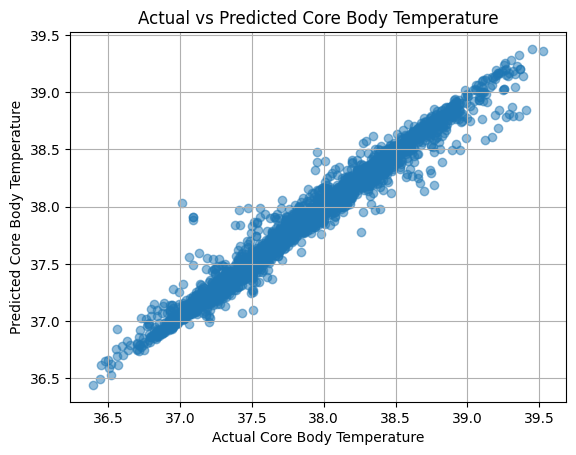

In [41]:
# below, I plotted the results between actual and predicted core body temperature. If y is close to x, then the model is performing well.
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Core Body Temperature")
plt.ylabel("Predicted Core Body Temperature")
plt.title("Actual vs Predicted Core Body Temperature")
plt.grid(True)
plt.show()

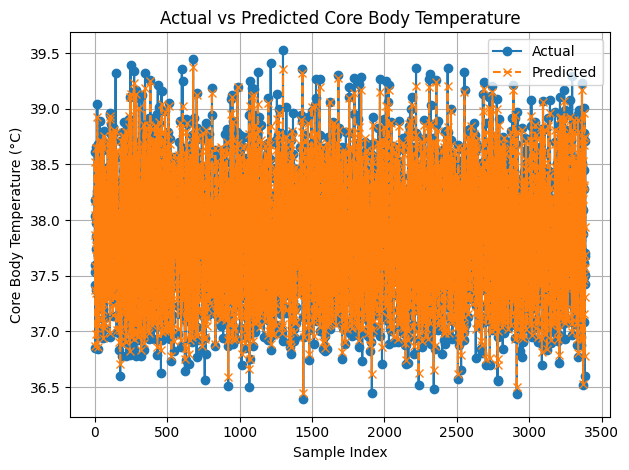

In [42]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label="Actual", linestyle='-', marker='o')
plt.plot(y_pred, label="Predicted", linestyle='--', marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Core Body Temperature (°C)")
plt.title("Actual vs Predicted Core Body Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\najma\AppData\Local\Temp\ipykernel_19360\2728585983.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type", y="Temperature", data=df, inner="box", palette="pastel")


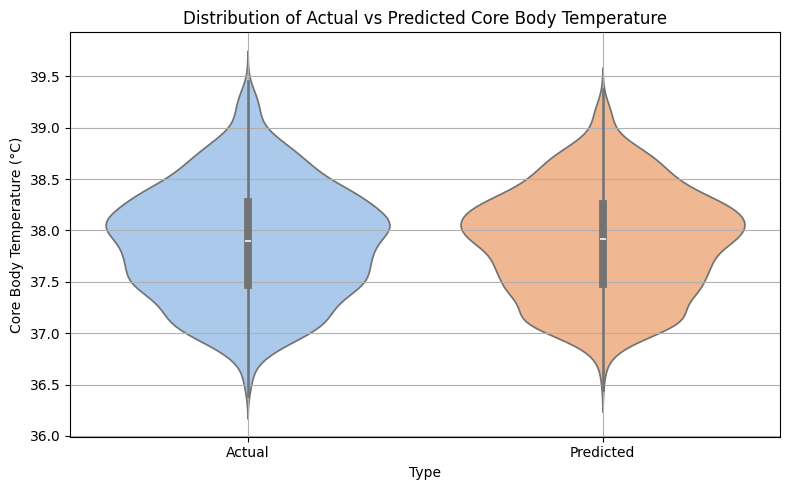

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for Seaborn
df = pd.DataFrame({
    "Temperature": list(y_test) + list(y_pred),
    "Type": ["Actual"] * len(y_test) + ["Predicted"] * len(y_pred)
})

# Plot violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x="Type", y="Temperature", data=df, inner="box", palette="pastel")
plt.title("Distribution of Actual vs Predicted Core Body Temperature")
plt.ylabel("Core Body Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\najma\AppData\Local\Temp\ipykernel_19360\2847074805.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Actual", shade=True, linewidth=2)
C:\Users\najma\AppData\Local\Temp\ipykernel_19360\2847074805.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted", shade=True, linewidth=2, linestyle="--")


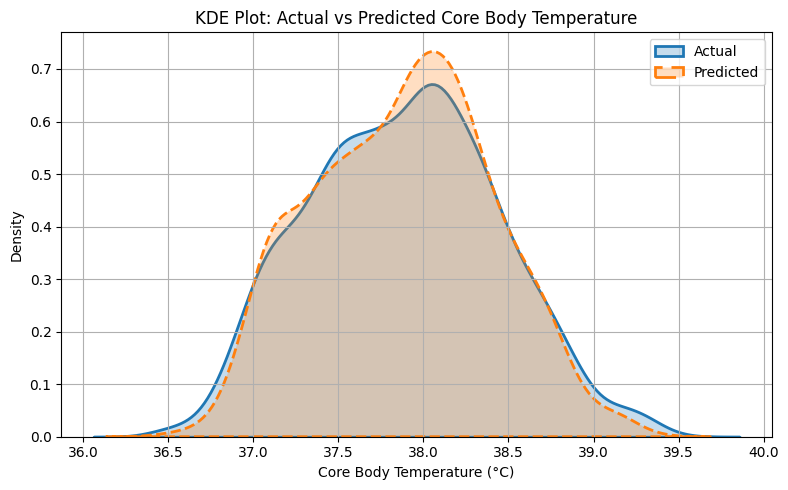

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.kdeplot(y_test, label="Actual", shade=True, linewidth=2)
sns.kdeplot(y_pred, label="Predicted", shade=True, linewidth=2, linestyle="--")

plt.title("KDE Plot: Actual vs Predicted Core Body Temperature")
plt.xlabel("Core Body Temperature (°C)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Step 5**: Test How Well the Model Works on My Data

In [45]:
import pandas as pd
# first load in my dataset from the heat stress study experiment (small test dataset)
df_experiment_data = pd.read_csv('merged_file_all_features.csv') # read in the excel file with the PROSPIE data
display(df_experiment_data.head(10))


,username,timestamp,CBT (Deg C):,temperature,temp_mean_5min,temp_median_5min,temp_std_5min,temp_mean_5min_lag10m,temp_median_5min_lag10m,temp_std_5min_lag10m,...,temp_env_std_35min_lag10m,humidity_env_mean_35min_lag10m,humidity_env_median_35min_lag10m,humidity_env_std_35min_lag10m,temp_env_diff_1,humidity_env_diff_1,temp_env_slope_5m,humidity_env_slope_5m,tod_sin_env,tod_cos_env
0,user1,2025-04-06 01:59:00+00:00,36.944444,-0.914807,-1.108807,-1.134807,0.156621,-0.572807,-0.454807,0.186333,...,NaN,NaN,NaN,NaN,-0.4,-1.3,0.000,0.000,-0.707107,0.707107
1,user1,2025-04-06 02:09:00+00:00,37.055556,-0.404807,-0.574807,-0.574807,0.147139,-1.108807,-1.134807,0.156621,...,NaN,NaN,NaN,NaN,0.0,0.2,-0.025,0.125,-0.678801,0.734323
2,user1,2025-04-06 02:10:00+00:00,37.055556,-0.294807,-0.476807,-0.474807,0.134981,-1.032807,-0.984807,0.141315,...,0.090790,63.720833,63.75,0.305001,0.0,-0.2,-0.025,0.000,-0.675590,0.737277
3,user1,2025-04-06 02:19:00+00:00,37.000000,0.415193,0.221193,0.185193,0.143805,-0.574807,-0.574807,0.147139,...,0.215647,63.162500,63.70,0.777293,0.0,-0.5,0.000,-0.025,-0.646124,0.763232
4,user1,2025-04-06 02:20:00+00:00,37.000000,0.505193,0.311193,0.315193,0.154370,-0.476807,-0.474807,0.134981,...,0.223242,63.095833,63.65,0.770928,0.0,0.0,0.000,0.000,-0.642788,0.766044
5,user1,2025-04-06 02:30:00+00:00,37.277778,0.545193,0.673193,0.645193,0.107098,0.311193,0.315193,0.154370,...,0.163964,62.520833,62.40,0.479111,0.0,0.6,0.000,0.200,-0.608761,0.793353
6,user1,2025-04-06 02:31:00+00:00,37.277778,0.515193,0.613193,0.615193,0.090388,0.403193,0.415193,0.160219,...,0.139811,62.475000,62.40,0.420404,0.0,-0.2,0.000,0.125,-0.605294,0.796002
7,user1,2025-04-06 02:39:00+00:00,37.277778,0.385193,0.419193,0.435193,0.027019,0.731193,0.745193,0.098641,...,0.043018,62.413333,62.40,0.192503,0.0,0.2,-0.025,0.025,-0.577145,0.816642
8,user1,2025-04-06 02:50:00+00:00,37.277778,0.455193,0.383193,0.375193,0.062209,0.405193,0.395193,0.028284,...,0.032280,62.545714,62.50,0.229248,0.0,0.4,0.000,0.175,-0.537300,0.843391
9,user1,2025-04-06 02:59:00+00:00,37.222222,0.365193,0.375193,0.375193,0.012247,0.351193,0.345193,0.056833,...,0.023550,62.705714,62.60,0.299944,0.1,0.1,0.025,0.050,-0.503774,0.863836


In [46]:
# drop columns that are not needed to better match the PROSPIE dataset
df_experiment_data = df_experiment_data.drop(columns=['username', 'timestamp', 'tod_sin', 'tod_cos', 'tod_coshr', 'tod_sinhr', 'tod_sin_env', 'tod_cos_env'])

display(df_experiment_data.head(10))


,CBT (Deg C):,temperature,temp_mean_5min,temp_median_5min,temp_std_5min,temp_mean_5min_lag10m,temp_median_5min_lag10m,temp_std_5min_lag10m,temp_mean_20min,temp_median_20min,...,temp_env_mean_35min_lag10m,temp_env_median_35min_lag10m,temp_env_std_35min_lag10m,humidity_env_mean_35min_lag10m,humidity_env_median_35min_lag10m,humidity_env_std_35min_lag10m,temp_env_diff_1,humidity_env_diff_1,temp_env_slope_5m,humidity_env_slope_5m
0,36.944444,-0.914807,-1.108807,-1.134807,0.156621,-0.572807,-0.454807,0.186333,-0.839544,-0.864807,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.4,-1.3,0.000,0.000
1,37.055556,-0.404807,-0.574807,-0.574807,0.147139,-1.108807,-1.134807,0.156621,-0.963755,-0.944807,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.2,-0.025,0.125
2,37.055556,-0.294807,-0.476807,-0.474807,0.134981,-1.032807,-0.984807,0.141315,-0.922176,-0.934807,...,20.929167,20.9,0.090790,63.720833,63.75,0.305001,0.0,-0.2,-0.025,0.000
3,37.000000,0.415193,0.221193,0.185193,0.143805,-0.574807,-0.574807,0.147139,-0.359307,-0.349807,...,20.804167,20.9,0.215647,63.162500,63.70,0.777293,0.0,-0.5,0.000,-0.025
4,37.000000,0.505193,0.311193,0.315193,0.154370,-0.476807,-0.474807,0.134981,-0.288807,-0.254807,...,20.787500,20.9,0.223242,63.095833,63.65,0.770928,0.0,0.0,0.000,0.000
5,37.277778,0.545193,0.673193,0.645193,0.107098,0.311193,0.315193,0.154370,0.409193,0.525193,...,20.591667,20.5,0.163964,62.520833,62.40,0.479111,0.0,0.6,0.000,0.200
6,37.277778,0.515193,0.613193,0.615193,0.090388,0.403193,0.415193,0.160219,0.445693,0.530193,...,20.570833,20.5,0.139811,62.475000,62.40,0.420404,0.0,-0.2,0.000,0.125
7,37.277778,0.385193,0.419193,0.435193,0.027019,0.731193,0.745193,0.098641,0.581193,0.530193,...,20.523333,20.5,0.043018,62.413333,62.40,0.192503,0.0,0.2,-0.025,0.025
8,37.277778,0.455193,0.383193,0.375193,0.062209,0.405193,0.395193,0.028284,0.400193,0.390193,...,20.511429,20.5,0.032280,62.545714,62.50,0.229248,0.0,0.4,0.000,0.175
9,37.222222,0.365193,0.375193,0.375193,0.012247,0.351193,0.345193,0.056833,0.375693,0.375193,...,20.505714,20.5,0.023550,62.705714,62.60,0.299944,0.1,0.1,0.025,0.050


In [47]:
# put into an excel file to see column names
df_experiment_data.columns.tolist()

['CBT (Deg C):',
 'temperature',
 'temp_mean_5min',
 'temp_median_5min',
 'temp_std_5min',
 'temp_mean_5min_lag10m',
 'temp_median_5min_lag10m',
 'temp_std_5min_lag10m',
 'temp_mean_20min',
 'temp_median_20min',
 'temp_std_20min',
 'temp_mean_20min_lag10m',
 'temp_median_20min_lag10m',
 'temp_std_20min_lag10m',
 'temp_mean_35min',
 'temp_median_35min',
 'temp_std_35min',
 'temp_mean_35min_lag10m',
 'temp_median_35min_lag10m',
 'temp_std_35min_lag10m',
 'temp_diff_1',
 'temp_slope_5m',
 'bpm',
 'bpm_mean_5min',
 'bpm_median_5min',
 'bpm_std_5min',
 'bpm_mean_5min_lag10m',
 'bpm_median_5min_lag10m',
 'bpm_std_5min_lag10m',
 'bpm_mean_20min',
 'bpm_median_20min',
 'bpm_std_20min',
 'bpm_mean_20min_lag10m',
 'bpm_median_20min_lag10m',
 'bpm_std_20min_lag10m',
 'bpm_mean_35min',
 'bpm_median_35min',
 'bpm_std_35min',
 'bpm_mean_35min_lag10m',
 'bpm_median_35min_lag10m',
 'bpm_std_35min_lag10m',
 'bpm_diff_1',
 'bpm_slope_5m',
 'env_Temperature_Celsius',
 'Relative_Humidity',
 'temp_env_mean

In [48]:
# Split the data into features (X) and target (y)
X_experiment_data = df_experiment_data.drop(columns=["CBT (Deg C):"])
y_experiment_data = df_experiment_data["CBT (Deg C):"]
print(X_experiment_data.shape, y_experiment_data.shape)

# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_experiment_data, y_experiment_data, test_size=0.2, random_state=42)
print(X_train_exp.shape, X_test_exp.shape, y_train_exp.shape, y_test_exp.shape)
y_train_exp.isnull().sum() + y_test_exp.isnull().sum() # check if there are missing core body temp values in either training or testing sets


(830, 84) (830,)
(664, 84) (166, 84) (664,) (166,)


np.int64(0)

In [49]:
y_pred_experiment_data = model.predict(X_experiment_data)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error

mse = mean_squared_error(y_experiment_data, y_pred_experiment_data)
r2 = r2_score(y_experiment_data, y_pred_experiment_data)
rmse = mse ** 0.5
mae = mean_absolute_error(y_experiment_data, y_pred_experiment_data)
mape = mean_absolute_percentage_error(y_experiment_data, y_pred_experiment_data)
explained_var = explained_variance_score(y_experiment_data, y_pred_experiment_data)

print(f"MAE: {mae:.2f}") # Mean Absolute Error, average absolute difference between the predicted and the actual values
print(f"MSE: {mse:.2f}") # Mean Squared Error, average squared difference between the predicted and the actual values
print(f"RMSE: {rmse:.2f}") # Root Mean Squared Error, square root of MSE, gives an idea of the average error magnitude
print(f"MAPE: {mape:.2%}") # Mean Absolute Percentage Error, average absolute percentage difference between the predicted and the actual values
print(f"R² Score: {r2:.2f}") # R-squared, proportion of variance in the dependent variable that is predictable from the independent variables
print(f"Explained Variance Score: {explained_var:.2f}") # Explained Variance Score, measures the proportion to which a model accounts for the variation (dispersion) of a given data set

MAE: 0.93
MSE: 1.06
RMSE: 1.03
MAPE: 2.56%
R² Score: -5.67
Explained Variance Score: -0.25


C:\Users\najma\AppData\Local\Temp\ipykernel_19360\3478593179.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_experiment_data, label="Actual", shade=True, linewidth=2)
C:\Users\najma\AppData\Local\Temp\ipykernel_19360\3478593179.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_experiment_data, label="Predicted", shade=True, linewidth=2, linestyle="--")


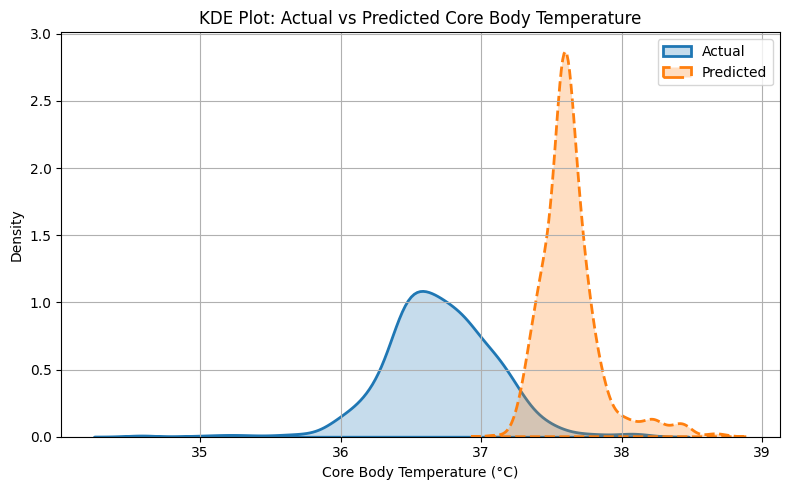

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.kdeplot(y_experiment_data, label="Actual", shade=True, linewidth=2)
sns.kdeplot(y_pred_experiment_data, label="Predicted", shade=True, linewidth=2, linestyle="--")

plt.title("KDE Plot: Actual vs Predicted Core Body Temperature")
plt.xlabel("Core Body Temperature (°C)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
# Replace these with your actual arrays
cbt_prospie = df_cleaned # full PROSPIE CBT values
cbt_mine = df_experiment_data     # your Fitbit CBT values

from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assign feature columns
feature_cols = [
    'Environmental temperature (chamber or cooling area outside chamber) - Temp',
    'Environmental temperature (chamber or cooling area outside chamber) - Humidity',
    'SkinTemp - lower arm',
    'HR',
    'HRV - RMSSDmanual'
]

# Add label column to each dataset
cbt_prospie['dataset'] = 'PROSPIE'
cbt_mine['dataset'] = 'Mine'

# Combine datasets
df_all = pd.concat([cbt_prospie, cbt_mine], ignore_index=True)

# Extract feature matrix and labels
X = df_all[feature_cols]
y = df_all['dataset']



KeyError: "None of [Index(['Environmental temperature (chamber or cooling area outside chamber) - Temp',\n       'Environmental temperature (chamber or cooling area outside chamber) - Humidity',\n       'SkinTemp - lower arm', 'HR', 'HRV - RMSSDmanual'],\n      dtype='object')] are in the [columns]"

C:\Users\najma\AppData\Local\Temp\ipykernel_19360\3986802423.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


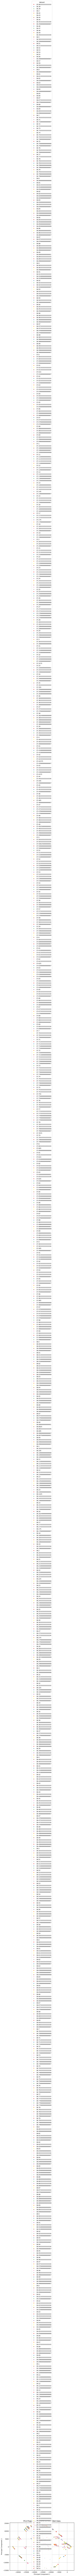

In [52]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Run PCA on imputed data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_imputed)

# Plotting remains the same
pca_df = pd.DataFrame(pca_result, columns=['PC2', 'PC1'])
pca_df['dataset'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC2', y='PC1', hue='dataset', alpha=0.7, palette='Set1')
plt.title("PCA Projection: PROSPIE vs Your Fitbit Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

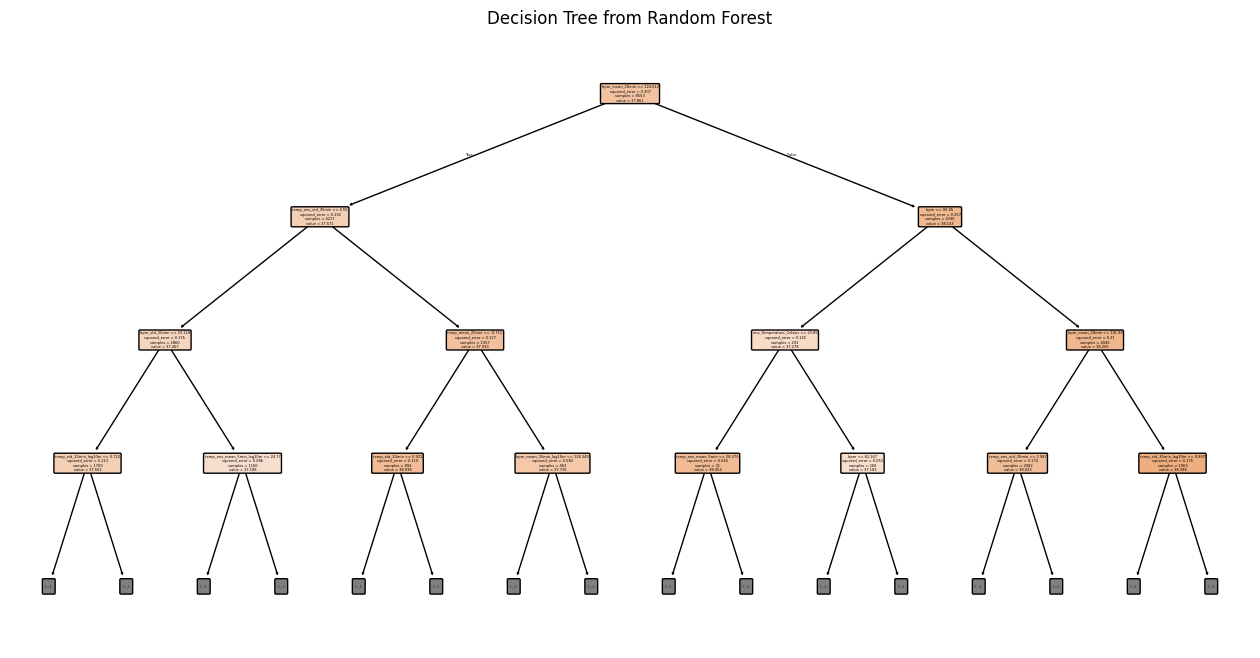

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = X_train.columns.tolist()
# Plot one tree from your forest
tree = model.estimators_[0]  # for RandomForest

plt.figure(figsize=(16, 8))
plot_tree(tree, 
          filled=True, 
          feature_names=feature_names,
          rounded=True,
          max_depth=3)  # limit depth to make it readable
plt.title("Decision Tree from Random Forest")
plt.show()

### **Try Training XGBOOST Model on PROSPIE Dataset**

In [54]:
# pip install -U xgboost
# pip install xgboost scikit-learn
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

print("xgboost version:", xgb.__version__)

# keep the feature names if X_train is a DataFrame (note that this is optional)
feat_names = list(X_train.columns) if hasattr(X_train, "columns") else None

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feat_names) # create DMatrix for xgboost

xgboost version: 3.0.5


In [55]:
# Define parameters for XGBoost and then perform cross-validation to find the best number of boosting rounds
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "tree_method": "hist",     # "gpu_hist" if you have a CUDA GPU
    "learning_rate": 0.02,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,             # L2 reg
    "random_state": 42
}

# below is the function to perform cross-validation to tune hyperparameters and find the best number of boosting rounds
cv = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=3000,      # upper bound, we’ll early-stop via cv
    nfold=5,
    early_stopping_rounds=100, # version-agnostic here
    verbose_eval=False,
    seed=42
)

best_rounds = len(cv)  # number of boosting rounds until early stop

In [56]:
# now train the XGboost model

model = XGBRegressor(
    n_estimators=best_rounds,
    learning_rate=params["learning_rate"],
    max_depth=params["max_depth"],
    subsample=params["subsample"],
    colsample_bytree=params["colsample_bytree"],
    reg_lambda=params["lambda"],
    random_state=params["random_state"],
    n_jobs=-1,
    tree_method=params["tree_method"],
    eval_metric="rmse"         # keep inside constructor for 2.x; harmless on 1.x
)

model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=3000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [57]:
# now evaluate the model performance

pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print(f"Best rounds: {best_rounds} | RMSE: {rmse:.4f} | R^2: {r2:.4f}")
print(f"MAE: {mae:.4f}")

Best rounds: 3000 | RMSE: 0.0659 | R^2: 0.9860
MAE: 0.0421


In [58]:
# understand what were the top feature gain
booster = model.get_booster()
gain_imp = booster.get_score(importance_type="gain")
if feat_names:
    gain_imp = { (feat_names[int(k[1:])] if k.startswith("f") and k[1:].isdigit() else k): v
                 for k, v in gain_imp.items() }
imp_df = pd.DataFrame(list(gain_imp.items()), columns=["feature", "gain"])\
             .sort_values("gain", ascending=False)
print(imp_df.head(20))

                      feature       gain
28             bpm_mean_20min  10.179831
70         temp_env_std_35min   3.309168
23            bpm_median_5min   1.908841
22              bpm_mean_5min   1.605572
34             bpm_mean_35min   1.374833
21                        bpm   1.319274
36              bpm_std_35min   1.186072
30              bpm_std_20min   1.026152
9              temp_std_20min   0.821179
45       temp_env_median_5min   0.769904
42    env_Temperature_Celsius   0.751680
24               bpm_std_5min   0.642330
76  temp_env_std_35min_lag10m   0.591434
15             temp_std_35min   0.523881
18      temp_std_35min_lag10m   0.513604
68        temp_env_mean_35min   0.466992
57      temp_env_median_20min   0.404219
58         temp_env_std_20min   0.380274
13            temp_mean_35min   0.362252
56        temp_env_mean_20min   0.356438


### **Now Try Fine-Tuning XGBOOST Model on Fitbit Dataset**

In [59]:
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# prepare the new dataset as a matrix
dtrain_exp = xgb.DMatrix(X_experiment_data, label=y_experiment_data)

# then extract booster and parameters that were predefined
booster = model.get_booster()
params = booster.attributes()  # this holds some metadata, not all training params

# redefine parameters
train_params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.02,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,
    "tree_method": "hist",
    "random_state": 42
}

In [60]:
# fine tune the XGBoost model
booster_finetuned = xgb.train(
    params=train_params,
    dtrain=dtrain_exp,
    num_boost_round=200,   # number of new boosting rounds
    xgb_model=booster      # continue from existing model
)

# then utilize sklearn style 
model_finetuned = xgb.XGBRegressor()
model_finetuned._Booster = booster_finetuned

In [61]:
# evaluate fine-tuned model
pred_exp = model_finetuned.predict(X_test_exp)
rmse_exp = root_mean_squared_error(y_test_exp, pred_exp)
r2_exp = r2_score(y_test_exp, pred_exp)
mae = mean_absolute_error(y_test_exp, pred_exp)
print(f"Fine-tuned MAE: {mae:.4f}")
print(f"Fine-tuned RMSE: {rmse_exp:.4f} | R²: {r2_exp:.4f}")

# Compare to previous predictions (optional)
if 'y_pred_experiment_data' in locals():
    diff = root_mean_squared_error(y_test_exp, pred_exp)
    print(f"Change in predictions vs previous model: {diff:.4f}")

Fine-tuned MAE: 0.1256
Fine-tuned RMSE: 0.1609 | R²: 0.8467
Change in predictions vs previous model: 0.1609


### Now Save the Model 

In [62]:
import joblib
from pathlib import Path

# Create a "models" folder if it doesn't exist
model_dir = Path("models")
model_dir.mkdir(exist_ok=True)

# Define where to save your model
model_path = model_dir / "model_finetuned.pkl"

# Save the model
joblib.dump(model_finetuned, model_path)

print(f"Model saved at: {model_path.resolve()}")

Model saved at: C:\Users\najma\OneDrive - Vanderbilt\Heat Stress Research\Machine Learning Algorithm\Model Training Using Public Dataset\Dataset for 'Prediction of Core Body Temperature from Multiple Variables'\models\model_finetuned.pkl


In [63]:
api_model_dir = Path(r"C:\Users\najma\OneDrive - Vanderbilt\HeatStress_API\models")
api_model_dir.mkdir(parents=True, exist_ok=True)
model_path = api_model_dir / "model_finetuned.pkl"
joblib.dump(model_finetuned, str(model_path))

['C:\\Users\\najma\\OneDrive - Vanderbilt\\HeatStress_API\\models\\model_finetuned.pkl']